In [6]:
import pandas as pd
import numpy as np
# import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
from dimensionality_reduction import *


                  0             1             2
count  25132.000000  25132.000000  25132.000000
mean       0.524477      0.003140      0.608781
std        0.302703      0.011110      0.291809
min        0.000011      0.000423      0.042923
25%        0.242867      0.001698      0.354062
50%        0.568801      0.003740      0.642145
75%        0.785597      0.004307      0.863974
max        1.001686      1.747023      1.097977
          0         1         2
0  0.000011  0.001008  0.102310
1  0.000077  0.001199  0.103196
2  0.000135  0.001140  0.111045
3  0.000209  0.001256  0.101965
4  0.000231  0.002668  0.098028


In [37]:
%matplotlib inline
# %matplotlib notebook
# %pylab
plt.rcParams['figure.figsize'] = (16,19)
plt.style.use('ggplot')

df_rd = df_pca(caracteristicas_df,n_comp = 3)
# df_rd = df_svd(caracteristicas_df,n_comp = 3, max_iter=100)

print(df_rd.describe())
print(df_rd.head(5))

                  0             1             2
count  2.513200e+04  25132.000000  25132.000000
mean   1.803438e+07   -996.748007   -258.016472
std    3.027001e-01      0.011102      0.293580
min    1.803438e+07   -996.749732   -258.530670
25%    1.803438e+07   -996.749564   -258.273116
50%    1.803438e+07   -996.747042   -257.983591
75%    1.803438e+07   -996.746960   -257.758754
max    1.803438e+07   -995.004085   -257.531013
              0           1           2
0  1.803438e+07 -996.749695 -258.529291
1  1.803438e+07 -996.749514 -258.529571
2  1.803438e+07 -996.749648 -258.529768
3  1.803438e+07 -996.749441 -258.529105
4  1.803438e+07 -996.747993 -258.529294


In [41]:
dataframe = pd.read_csv(r"caracteristicas.csv")
dataframe.head()

,Unnamed: 0,id,room_type,price,minimum_nights_x,number_of_reviews,reviews_per_month,calculated_host_listings_count,host_response_time,host_response_rate,...,minimum_maximum_nights,maximum_maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy
0,0,3109,0,75,3,8,0.28,1,2,100,...,15,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0
1,1,5396,0,115,1,173,1.44,1,3,100,...,90,90,91.0,9.0,8.0,9.0,9.0,10.0,9.0,2
2,2,7397,0,115,10,243,2.47,1,3,100,...,23,23,94.0,10.0,9.0,10.0,10.0,10.0,10.0,1
3,5,9952,0,75,5,17,0.23,1,2,100,...,120,120,99.0,10.0,10.0,10.0,10.0,10.0,10.0,2
4,8,10710,0,90,3,40,0.36,1,3,100,...,730,730,88.0,9.0,9.0,10.0,10.0,10.0,9.0,2


In [8]:
# dataframe.describe()

In [10]:
# print(dataframe.groupby('categoria').size())

In [11]:
# dataframe.drop(['categoria'],1).hist()
# dataframe.hist()
# plt.show()

In [12]:
# sb.pairplot(dataframe.dropna(), hue='categoria',height=4,vars=["op","ex","ag"],kind='scatter')

In [58]:
# X = np.array(dataframe[["op","ex","ag"]])



X1 = np.array(df_rd)[:,0:2]
X2 = np.array(dataframe[['price']])

print(X1.shape)
print(X2.shape)
X = np.concatenate((X1,X2),axis=1)

describe_x = pd.DataFrame(X)
describe_x = describe_x.dropna()

X = np.array(describe_x)
print(describe_x.describe())


# y = np.array(dataframe['categoria'])


X.shape

(25132, 2)
(25132, 1)
                  0             1             2
count  2.513200e+04  25132.000000  25132.000000
mean   1.803438e+07   -996.748007    122.865510
std    3.027001e-01      0.011102    117.401703
min    1.803438e+07   -996.749732      0.000000
25%    1.803438e+07   -996.749564     67.000000
50%    1.803438e+07   -996.747042     90.000000
75%    1.803438e+07   -996.746960    140.000000
max    1.803438e+07   -995.004085   3797.000000


(25132, 3)

In [14]:
# fig = plt.figure()
# ax = Axes3D(fig)
# colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
# asignar=[]
# for row in y:
#     asignar.append(colores[row])
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

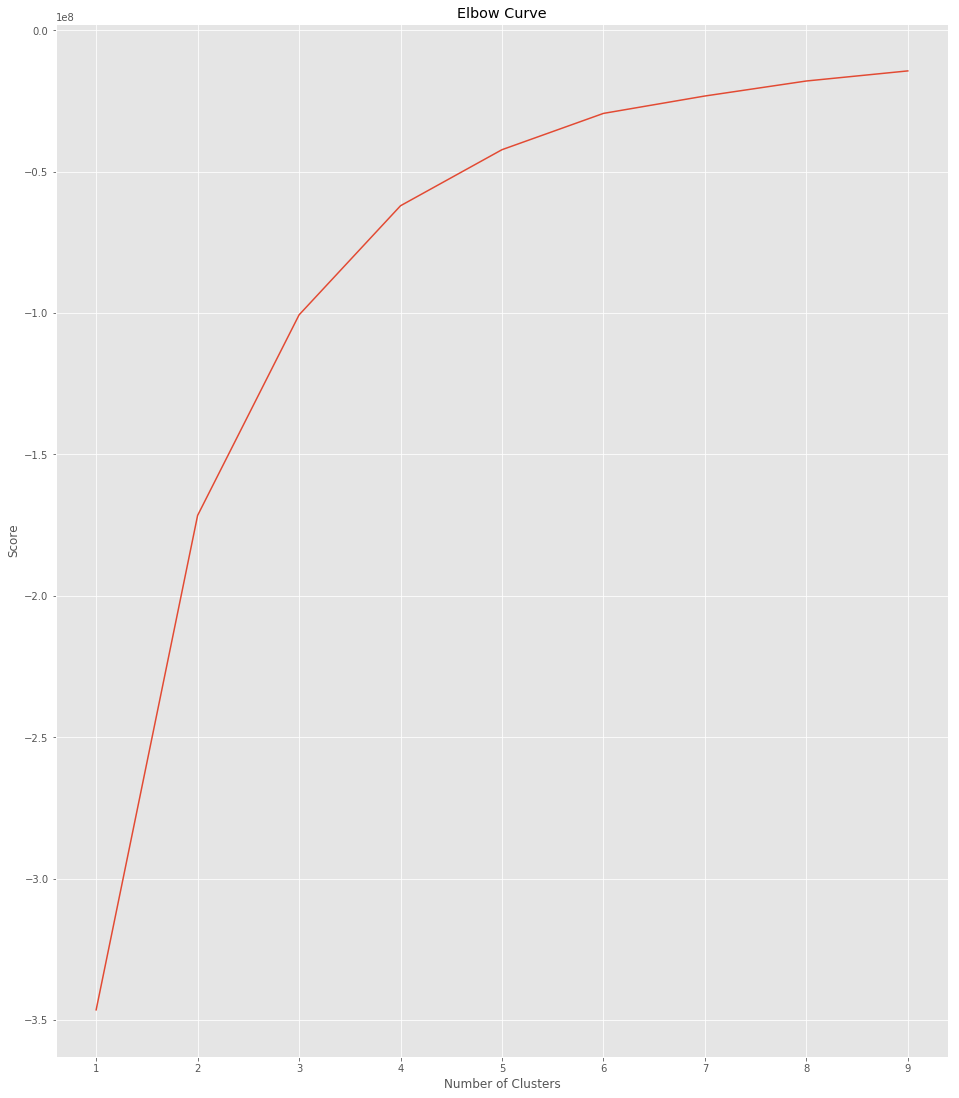

In [52]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [54]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.80343840e+07 -9.96747980e+02  2.06459768e+02]
 [ 1.80343840e+07 -9.96747504e+02  5.30968622e+02]
 [ 1.80343839e+07 -9.96748034e+02  8.11900974e+01]
 [ 1.80343840e+07 -9.96747779e+02  1.72441667e+03]]


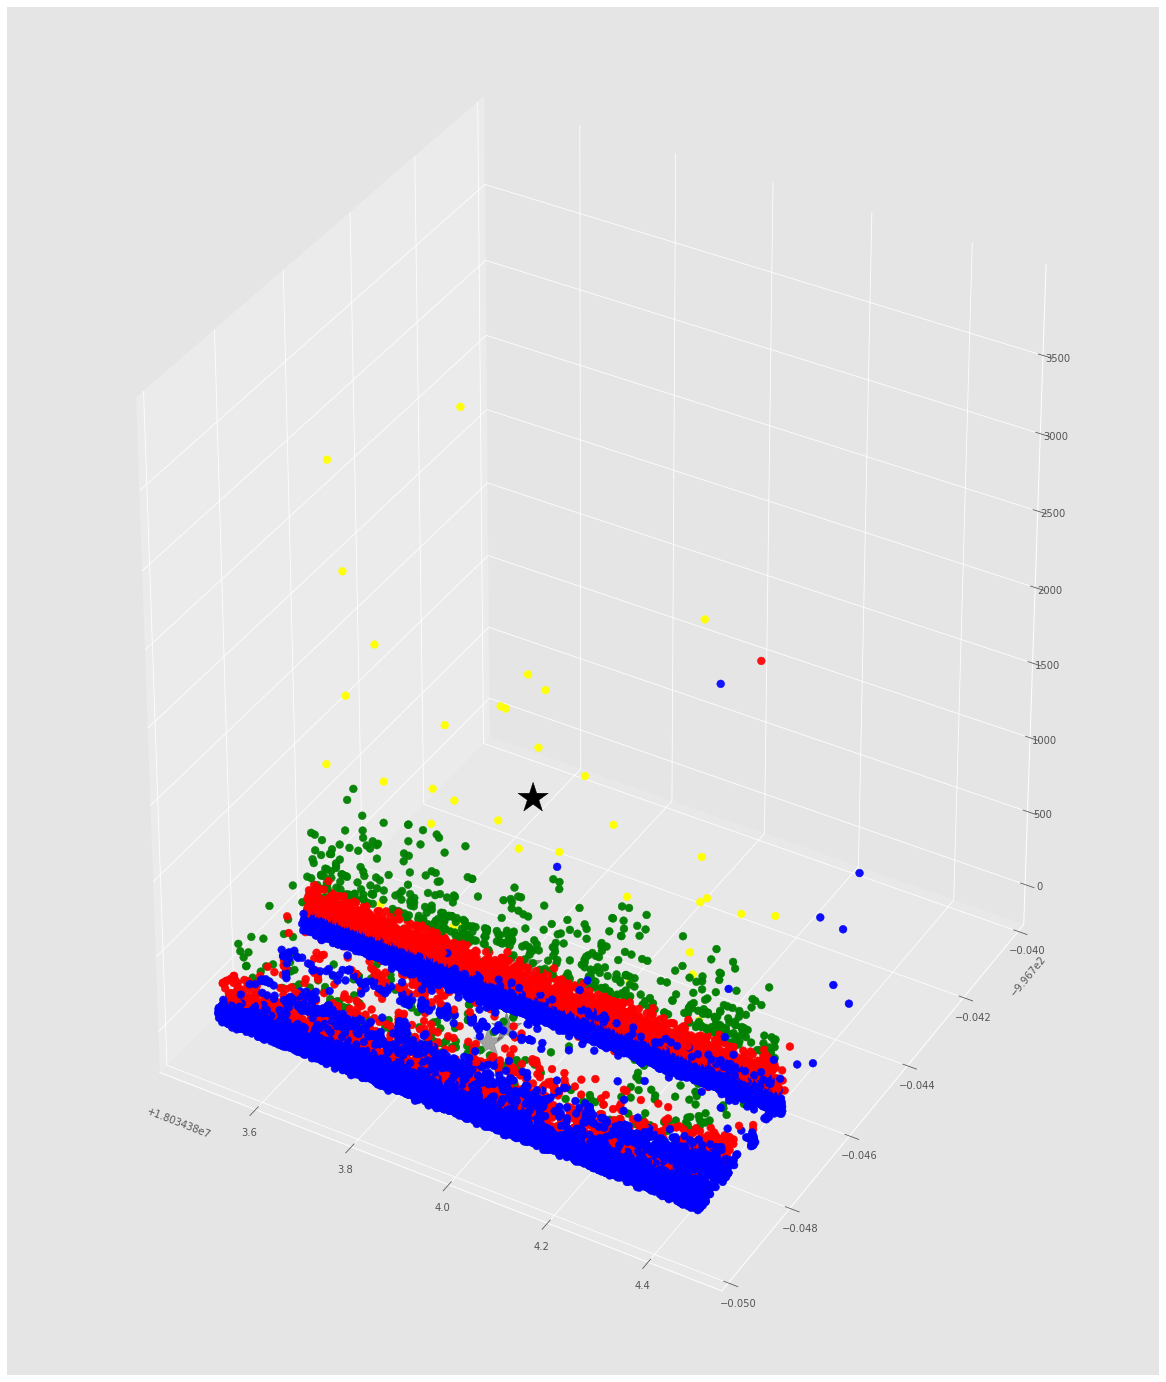

In [62]:
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
# colores=['red','green','blue','cyan','yellow']
colores=['red','green','blue','yellow']
colores2=['black','black','black','black']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)


ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.set_ylim(-996.75,-996.74)

ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores2, s=1000)